In [33]:
from os.path import join
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

import h5py
try:
    import GSHEWaveform
except ModuleNotFoundError:
    import sys
    sys.path.append("../")
    import GSHEWaveform
import utils
from glob import glob
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [179]:
loaddir = "/Users/stiskalek/Data/gshe_liv_alpha0/"

files, names_all = utils.get_liv_fnames(loaddir)

In [180]:
A0s = []
names = []
for i, file in enumerate(files):
    A0 = utils.A0_from_liv_samples(join(loaddir, file))
    if A0 is not None:
        A0s.append(A0 * 1e20)
        names.append(names_all[i])


sort = np.argsort(names)
names = [names[i] for i in sort]
A0s = [A0s[i] for i in sort]

<IPython.core.display.Javascript object>


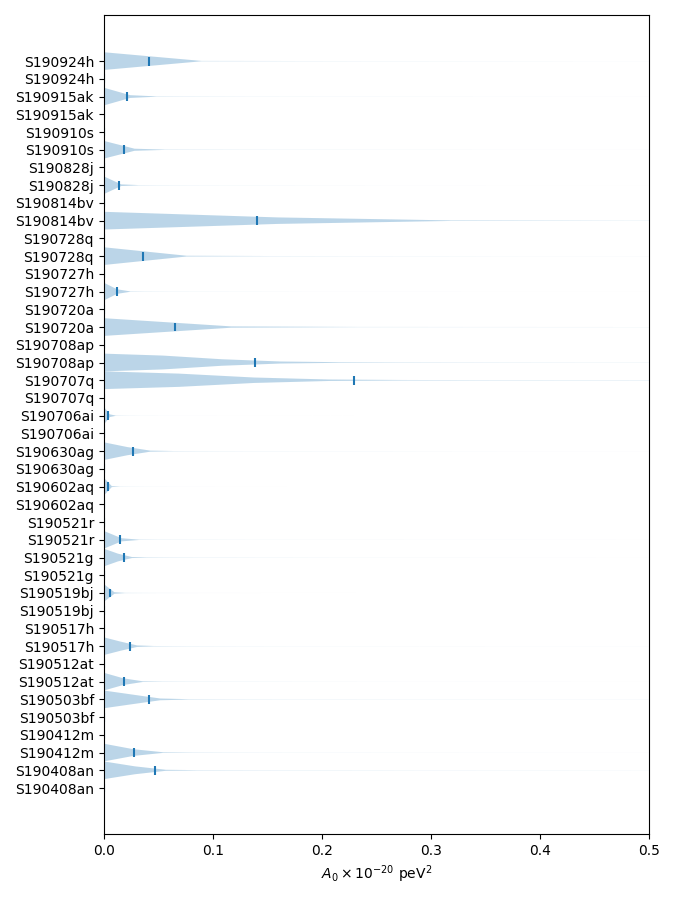

In [182]:
plt.figure(figsize=(9 * 0.75, 9))

plt.violinplot(A0s, showmeans=True, vert=False, showextrema=False, widths=1)
yticks = np.arange(1, len(names) + 1)
plt.yticks(xticks, names)
plt.xlim(0, 0.5)

plt.xlabel(r"$A_0 \times 10^{-20}~\mathrm{peV}^2$")
plt.tight_layout()
plt.savefig("/Users/stiskalek/Downloads/A0s.png", dpi=450)
plt.show()

In [ ]:
Mpc

In [ ]:
from scipy.constants import e

In [ ]:
1 * e 